In [213]:
#Import relevant libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [214]:
#Import the dataset
houseData = pd.read_csv("train.csv")
houseData.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [281]:
#Data cleaning -> pulling out relevant variables into individual series
SalePrice = houseData['SalePrice']

LotArea = houseData['LotArea']
GrLivArea = houseData['GrLivArea']
TotalBsmtSF = houseData["TotalBsmtSF"]
GarageArea = houseData["GarageArea"]

### Problem 1.a - Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?


[Text(0.5, 0, 'GarageArea')]

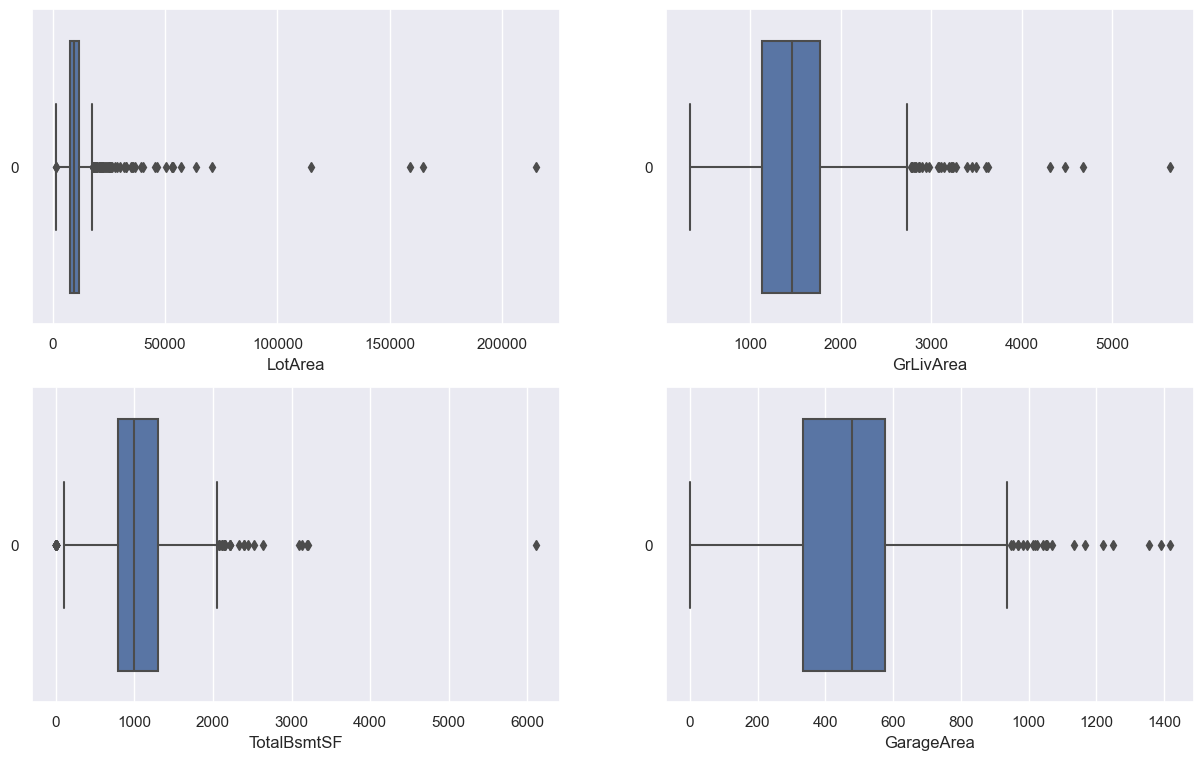

In [283]:
#Plot individual variables using boxplot

f , axes = plt.subplots(2,2,figsize=(15,9))
sb.boxplot(data = LotArea, orient = "h", ax = axes[0,0]).set(xlabel='LotArea')
sb.boxplot(data = GrLivArea, orient = "h", ax = axes[0,1]).set(xlabel='GrLivArea')
sb.boxplot(data = TotalBsmtSF, orient = "h", ax = axes[1,0]).set(xlabel='TotalBsmtSF')
sb.boxplot(data = GarageArea, orient = "h", ax = axes[1,1]).set(xlabel='GarageArea')


#### However, we are not able to tell the number of outliers based of the boxplot, hence, we will find IQR to determine number of outliers

In [216]:
#Function to find number of outliers
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers


In [282]:
#store our dataframes into a dict with names as its key
datalist = {'LotArea': LotArea, 'GrLivArea': GrLivArea, 'TotalBsmtSF': TotalBsmtSF, 'GarageArea': GarageArea}


#we will loop through the list, printing the name and its number of outliers
for name, dataset in datalist.items():
    outliers = find_outliers_IQR(dataset)
    print(name + " has "+ str(len(outliers)) + " number of outliers.")
    

LotArea has 69 number of outliers.
GrLivArea has 31 number of outliers.
TotalBsmtSF has 61 number of outliers.
GarageArea has 21 number of outliers.


##### "LotArea" has the highest number of outliers out of the 4 with 69 number of outliers.


### Problem 1.b - Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

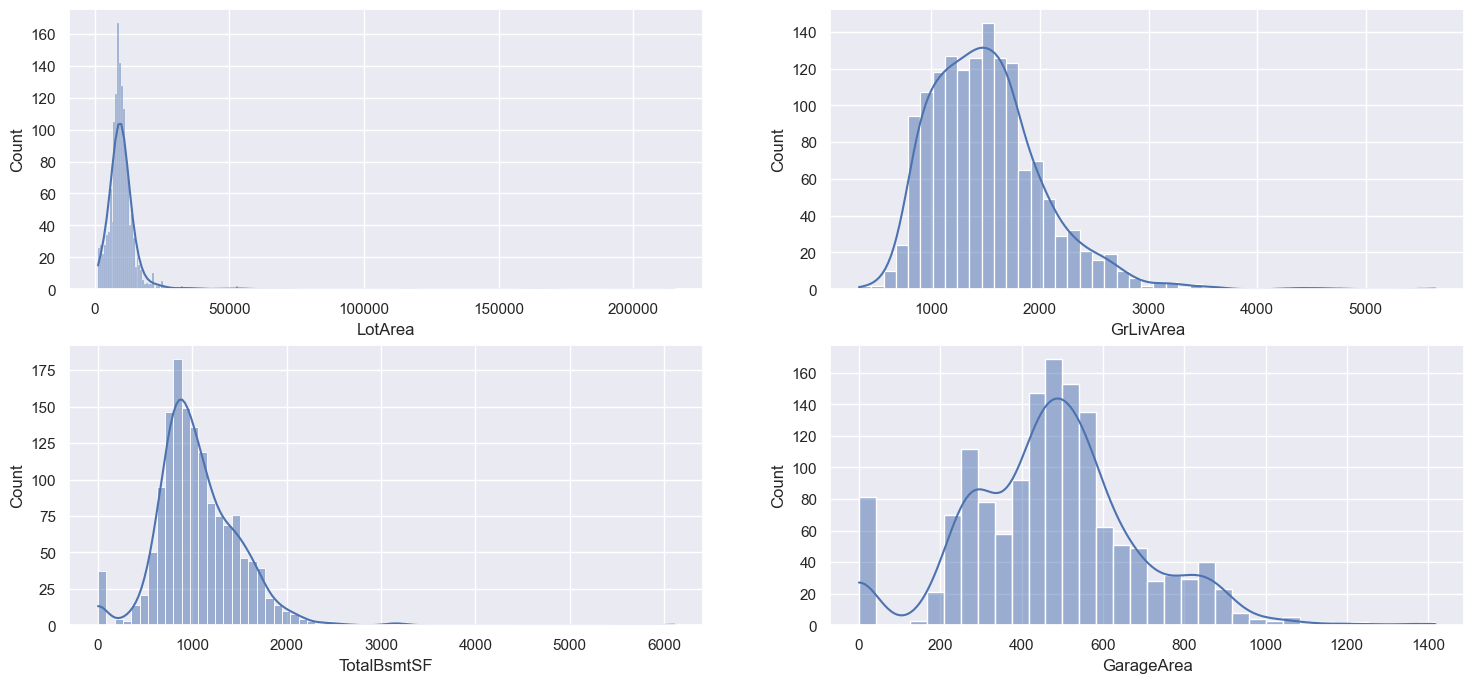

In [293]:
#Plot the 4 variables using histplot and compare them
f, axes = plt.subplots(2,2,figsize=(18, 8))

sb.histplot(data = LotArea, kde = True, ax = axes[0,0])
sb.histplot(data = GrLivArea, kde = True, ax = axes[0,1])
sb.histplot(data = TotalBsmtSF, kde = True, ax= axes[1,0])
sb.histplot(data = GarageArea, kde = True, ax = axes[1,1])

#### Visually, we can tell that "LotArea" is heavily positive skewed as compared to a normal contribution, we will utilise .skew function to determine whether our observation is correct

In [220]:
print("LotArea: ", LotArea.skew(axis = 0, skipna = True ))
print("GrLivArea: ",GrLivArea.skew(axis = 0, skipna = True))
print("TotalBsmtSF: ",TotalBsmtSF.skew(axis = 0, skipna = True))
print("GarageArea: ",GarageArea.skew(axis = 0, skipna = True))

LotArea:  12.207687851233496
GrLivArea:  1.3665603560164552
TotalBsmtSF:  1.5242545490627664
GarageArea:  0.17998090674623907


##### "LotArea" is the most skewed from the normal contribution.

### Problem 1.c - Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data

#### We can use correlation and plot it on heatmap to determine which of the 2 variables will help us the most in predicting SalePrice. The higher the correlation, the stronger the relationship between each other.

<AxesSubplot:>

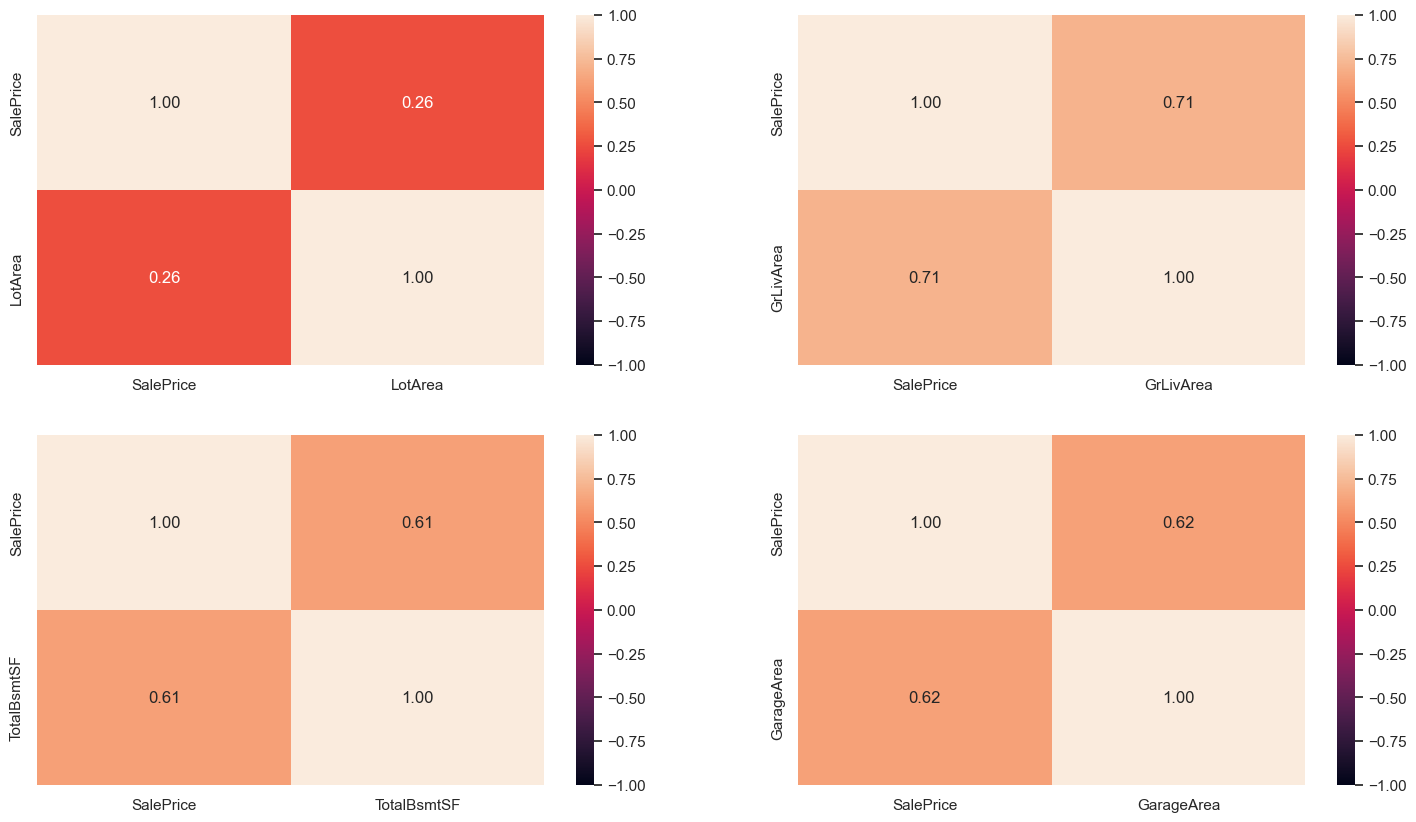

In [221]:
f, axes = plt.subplots(2,2, figsize = (18,10))

sb.heatmap(data = pd.concat([SalePrice, LotArea], axis = 1).reindex(SalePrice.index).corr(), vmin = -1, vmax= 1, annot = True, fmt = ".2f", ax = axes[0,0])
sb.heatmap(data = pd.concat([SalePrice, GrLivArea], axis = 1).reindex(SalePrice.index).corr(), vmin = -1, vmax= 1, annot = True, fmt = ".2f", ax = axes[0,1])
sb.heatmap(data = pd.concat([SalePrice, TotalBsmtSF], axis = 1).reindex(SalePrice.index).corr(), vmin = -1, vmax= 1, annot = True, fmt = ".2f", ax = axes[1,0])
sb.heatmap(data = pd.concat([SalePrice, GarageArea], axis = 1).reindex(SalePrice.index).corr(), vmin = -1, vmax= 1, annot = True, fmt = ".2f", ax = axes[1,1])

In [222]:
print("The correlation of SalesPrice to LotArea is: ", SalePrice.corr(LotArea))
print("The correlation of SalesPrice to GrLivArea is: ", SalePrice.corr(GrLivArea))
print("The correlation of SalesPrice to TotalBsmtSF is: ", SalePrice.corr(TotalBsmtSF))
print("The correlation of SalesPrice to GarageArea is: ", SalePrice.corr(GarageArea))

The correlation of SalesPrice to LotArea is:  0.26384335387140556
The correlation of SalesPrice to GrLivArea is:  0.708624477612652
The correlation of SalesPrice to TotalBsmtSF is:  0.6135805515591956
The correlation of SalesPrice to GarageArea is:  0.623431438918362


##### Both "GrLivArea" & "GarageArea" have the highest correlation to SalePrice, hence they are the top 2 variables that will help me the most in predicting SalesPrice

### Problem 2.a - Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

In [223]:
#import them into individual series
MSSubClass = houseData['MSSubClass']
Neighborhood = houseData['Neighborhood']
BldgType = houseData['BldgType']
OverallQual = houseData['OverallQual']

In [297]:
#similar to what we did in problem 1, we will iterate through the dict and print out the number of unique levels 
#for each variables

df = pd.DataFrame(houseData)

data = {"MSSubClass":"MSSubClass", "Neighborhood": "Neighborhood","BldgType": "BldgType", "OverallQual": "OverallQual"}
for name,data in data.items():
    print(name + " has " + str(df[data].nunique()) + " of unique levels.")

MSSubClass has 15 of unique levels.
Neighborhood has 25 of unique levels.
BldgType has 5 of unique levels.
OverallQual has 10 of unique levels.


#### "Neighborhood" has the highest number of unique levels, with 25 count of unique levels.

<AxesSubplot:xlabel='Neighborhood', ylabel='Count'>

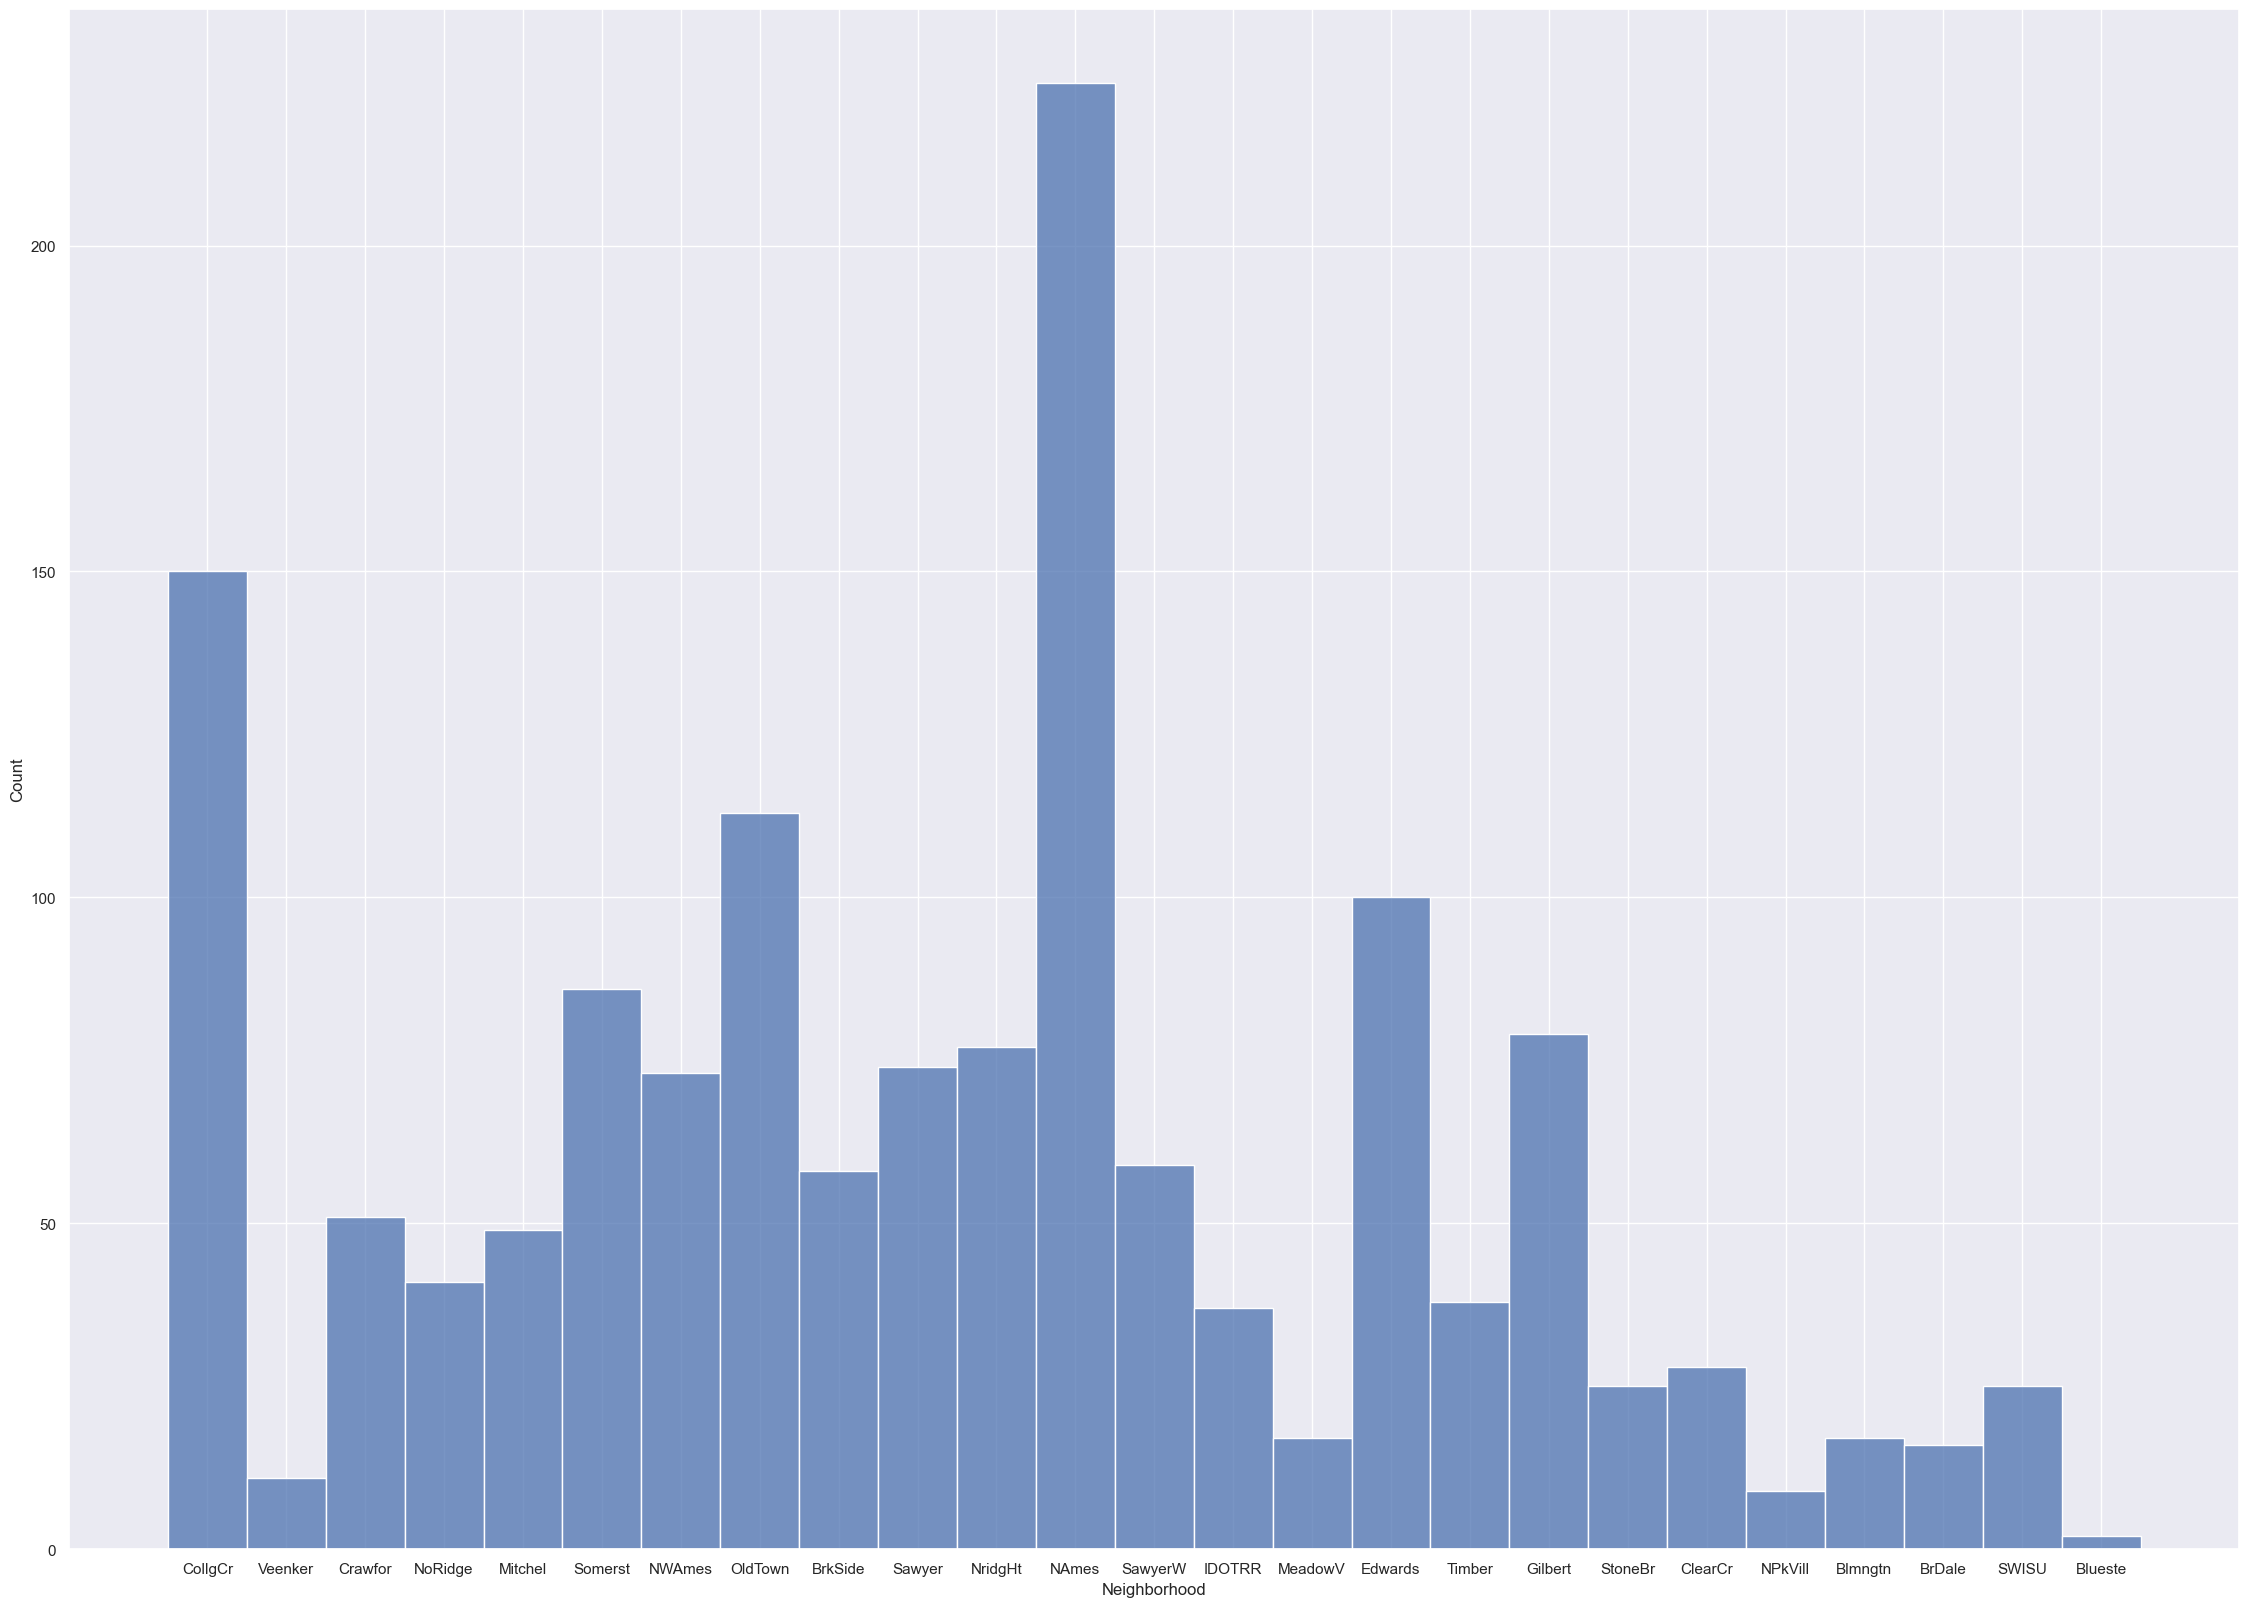

In [225]:
f = plt.figure(figsize = (28,20))
sb.histplot(data = Neighborhood)

#### "NAmes" has the highest count of houses amongst the 25 unique levels in "Neighborhood"

### Problem 2.b - Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data

#### Since we have categorical variables now, we will not be able to use correlation & heatmap to help us to determine the top two variables. Instead, we will use boxplot where the various categories will be plot against SalesPrice. Through this, we will try to observe any kind of trends, be it upward / linear / downward . 

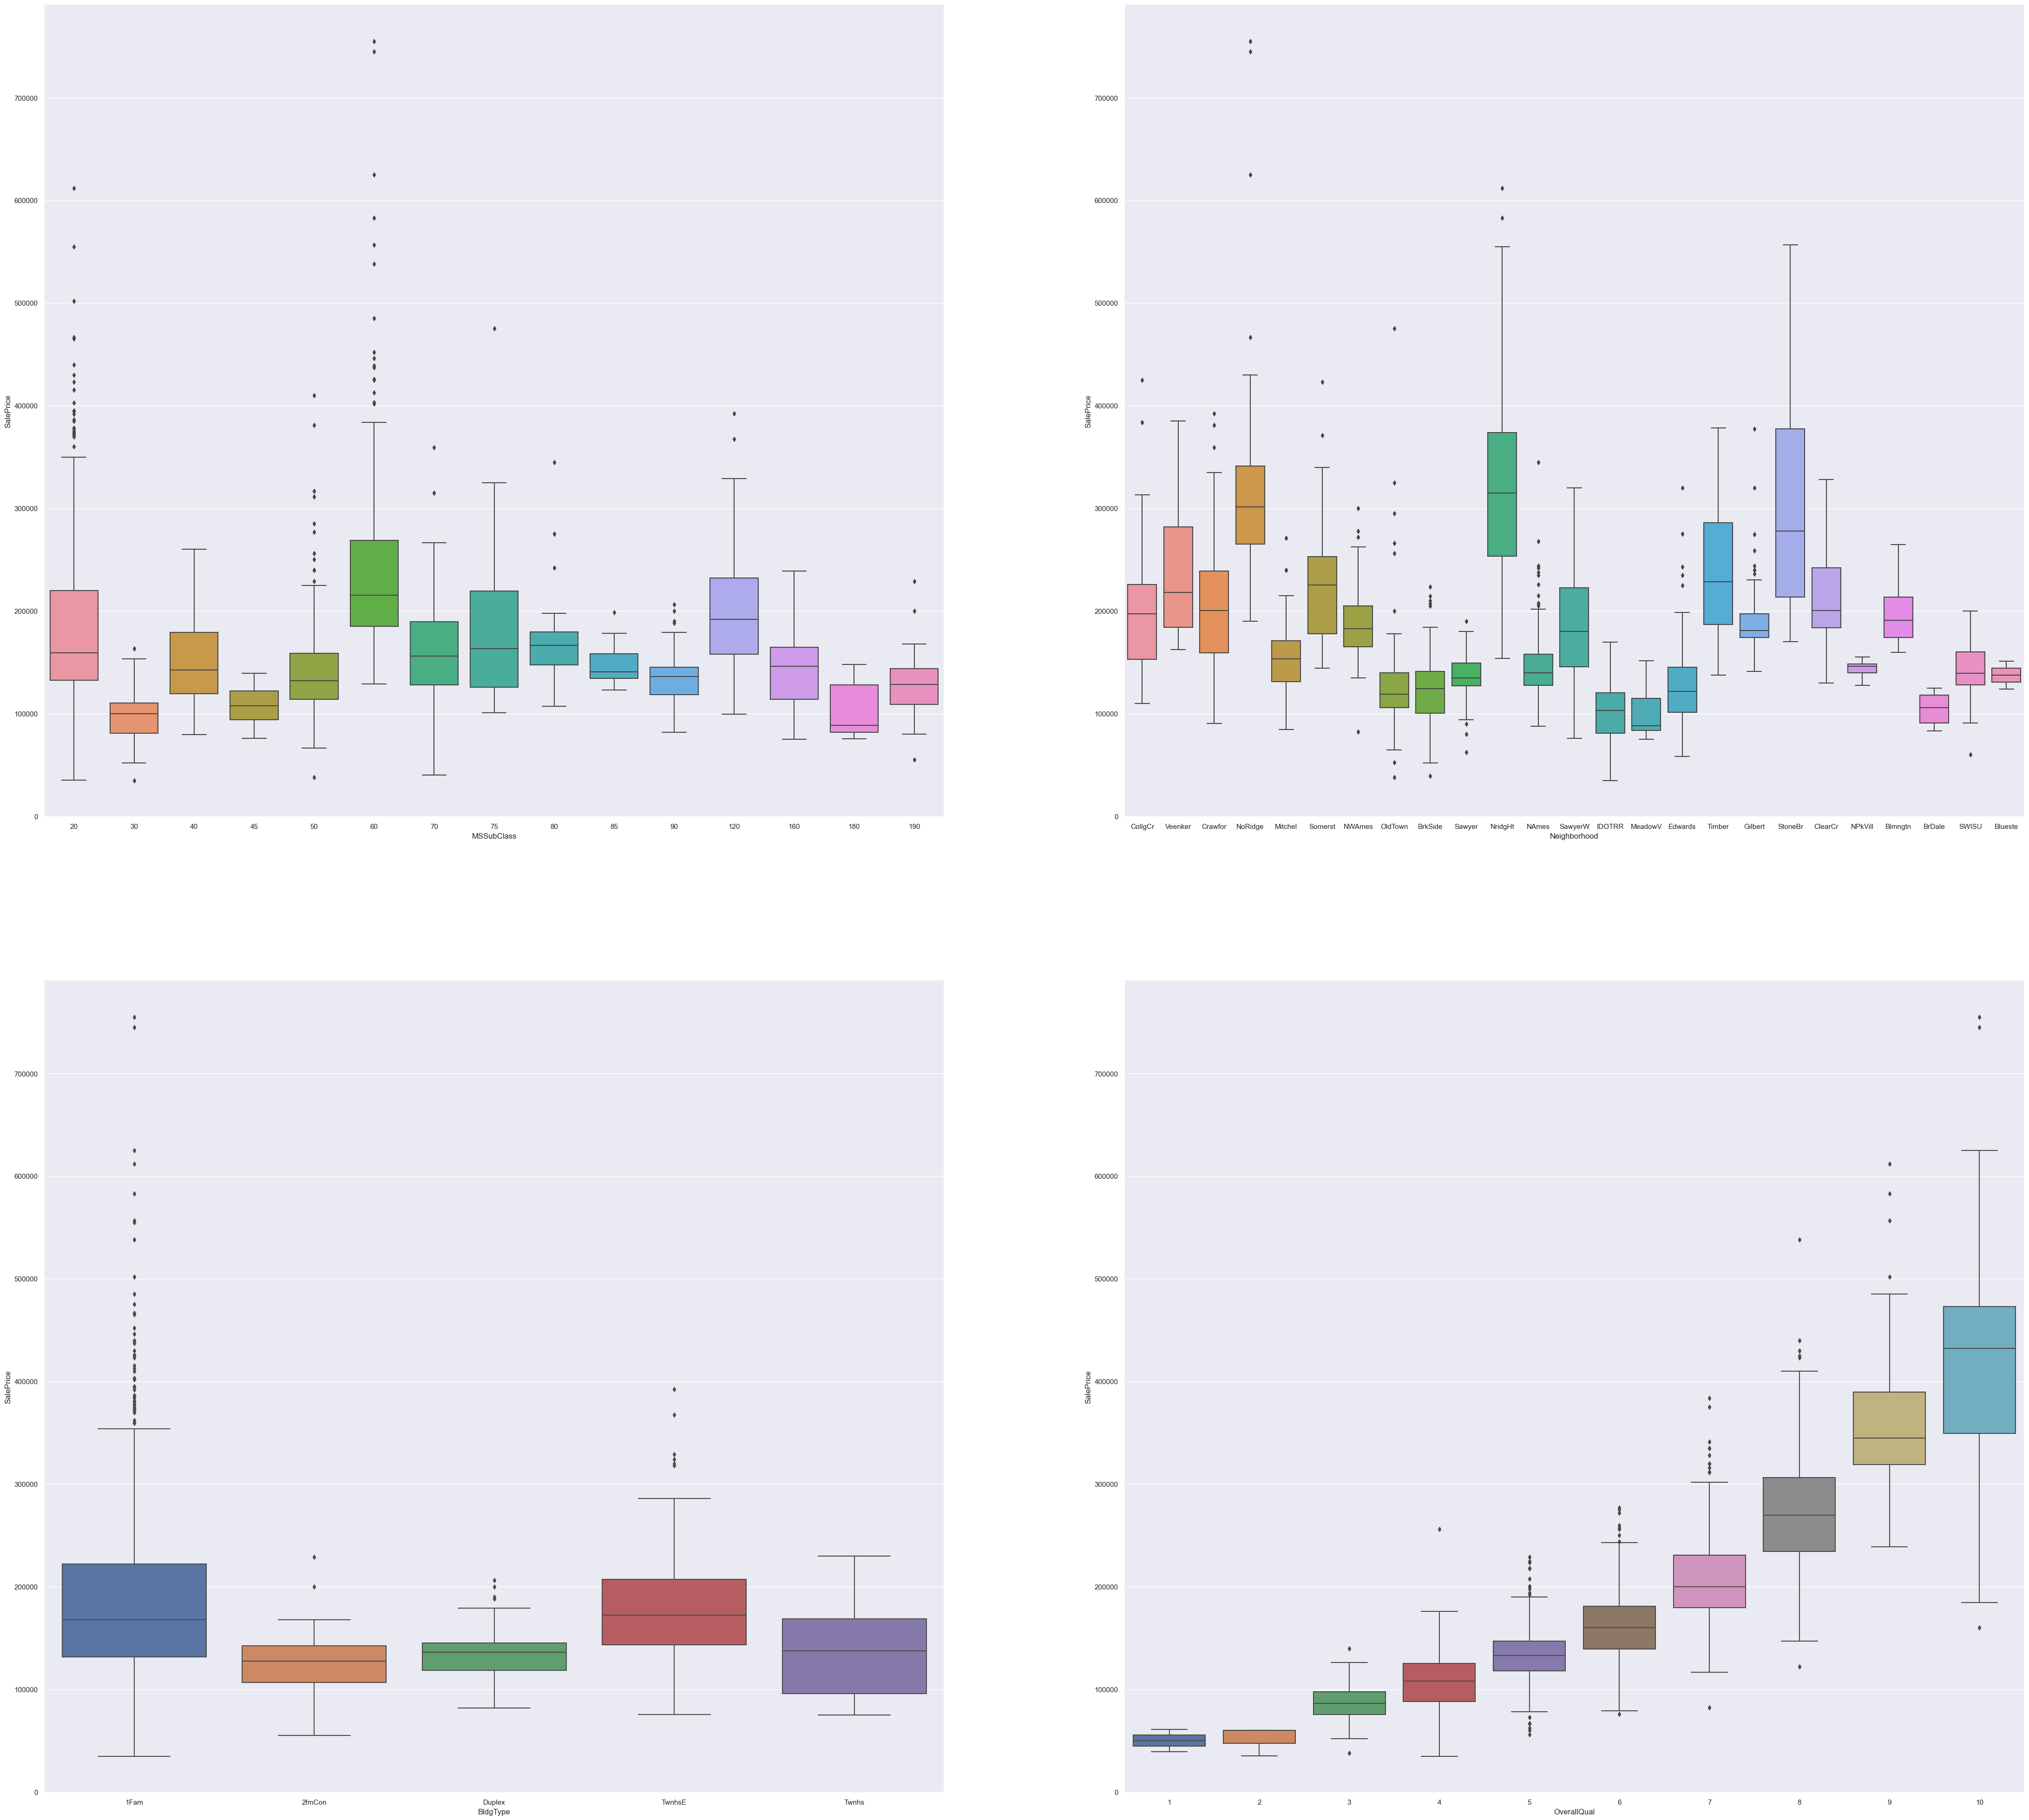

In [298]:
f, axes = plt.subplots(2,2, figsize = (55,50))
sb.boxplot(data = houseData, x = "MSSubClass", y = "SalePrice", ax = axes[0,0]);
sb.boxplot(data = houseData ,x = "Neighborhood", y = "SalePrice", ax = axes[0,1]);
sb.boxplot(data = houseData, x = "BldgType", y = "SalePrice", ax = axes[1,0]);
sb.boxplot(data = houseData, x = "OverallQual", y = "SalePrice", ax = axes[1,1]);

<b>Looking at the boxplots, we can see that higher "OverallQual" commands a higher SalesPrice in general. (Visible uptrend)

<b>In addition, i chose "Neighborhoood" over "MSSubClass" over a few reasons:</b><br>

1. Both variables exhibited similar graph trends as compared to "BldgeType". By observing the "BldgeType" we have little information of how it correlates to the SalePrice. It does not have any visible trend when compared against SalesPrice.
 

2. "Neighborhood" has higher sample size and lower count of outliers as compared to "MSSubClass". With a greater sample size, we can better observe how each levels will be able to affect the SalesPrice. With lower count of outliers, we know that the data obtained from "Neighborhood" are more concentrated around certain region, it provides a better and much more accurate representation when comparing it against SalesPrice.

    
    





---------------------------------------------------------------------------------------------------------------
### Problem 3.a - Does the SalePrice of a house get affected by whether it has a Garage or not? Justify your answer using EDA

#### I decided to use "GarageType" as a dataset to plot against SalePrice, however, i realized there was a major issues with it. No Garage houses are labelled as "NULL" / "NaN" and not as a string. If i were to plot with the existing dataset, "No Garage" houses will not be shown in the plot. 

#### Solution: we will use fillna() function to inplace "Nan" data with "No Garage", so that boxplot will be able to plot out everything.

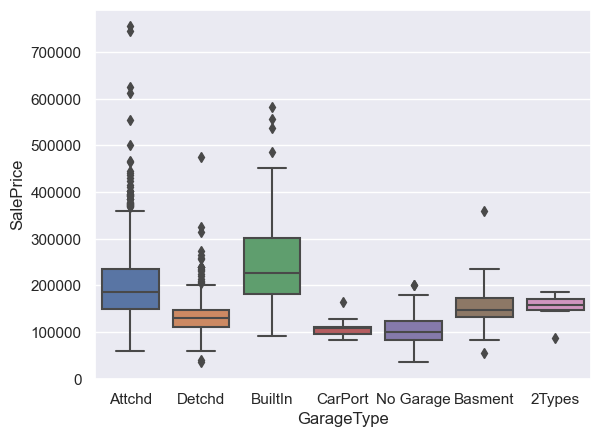

In [299]:
newdf = houseData[["SalePrice","GarageType"]]
newdf.head()

data_garage = newdf.copy()
data_garage.fillna("No Garage", inplace=True)
data_garage.sample(20)

sb.boxplot(data = data_garage, x = "GarageType", y = "SalePrice");

<b>Conclusion: By observing the GarageType against SalePrice, we can come to a common consensus that GarageType does not play a signifcant role in determining SalePrice. By comparing the median of other variables, "No Garage" still commands a lower salePrice in terms of median as compared to something like "BuiltIn". In conclusion, even though we do not see a clear correlation between SalePrice and GarageType among the levels, based on median itself, we can conclude that a house with no garage would generally be priced lesser than other houses with garages.</b>